# First Look at Data

Task Insights:
- We have to select 6 adverseries for the pokemons in Submission, and fill in their PokemonId in the Submission file.
- Optimizing mean hp percentage, is equivalent to maximizing battleResult="Remaining Hp of Winner".
- The Pokemon Types of the submission file, don't appeaer in the Battle Results.

Noteworthy Data Insights:
- Level is in Range [1, 99]
- WeatherAndTime is in {'Windy', 'Unknown', 'Sunshine', 'Rain', 'Night'}
- Most Stats have few extremes, and are concentrated on the lower end

Open Questions:
- How to handle 'unknown' Weather?

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
catalog = context.catalog

In [3]:
Submission = catalog.load('Submission')
AvailablePokemons = catalog.load('AvailablePokemons')
BattleResults = catalog.load('Battle_Results')
Weakness_Pokemon = catalog.load('Weakness_Pokemon')
AllPokemons = catalog.load('All_Pokemons')

2020-05-18 10:52:26,412 - kedro.io.data_catalog - INFO - Loading data from `Submission` (CSVDataSet)...
2020-05-18 10:52:26,421 - kedro.io.data_catalog - INFO - Loading data from `AvailablePokemons` (CSVDataSet)...
2020-05-18 10:52:26,427 - kedro.io.data_catalog - INFO - Loading data from `Battle_Results` (CSVDataSet)...
2020-05-18 10:52:31,371 - kedro.io.data_catalog - INFO - Loading data from `Weakness_Pokemon` (CSVDataSet)...
2020-05-18 10:52:31,378 - kedro.io.data_catalog - INFO - Loading data from `All_Pokemons` (CSVDataSet)...


### Battle Results

In [5]:
BattleResults.head()

,Name_1,Level_1,Price_1,HP_1,Attack_1,Defense_1,Sp_Atk_1,Sp_Def_1,Speed_1,Legendary_1,...,Price_2,HP_2,Attack_2,Defense_2,Sp_Atk_2,Sp_Def_2,Speed_2,Legendary_2,WeatherAndTime,BattleResult
0,Metapod,30,441,150,36,103,47,47,58,False,...,1589,262,393,306,164,211,253,False,Windy,-262
1,Pinsir,36,1227,196,304,237,129,164,197,False,...,1583,547,127,365,172,172,200,False,Unknown,-424
2,Metapod,15,297,92,26,73,33,33,40,False,...,4913,821,1208,947,504,652,781,False,Windy,-821
3,Pinsir,40,1401,228,346,270,146,187,224,False,...,588,202,47,138,63,63,75,False,Unknown,214
4,Pinsir,12,634,91,157,124,70,86,106,False,...,381,126,32,90,41,41,51,False,Windy,41


In [8]:
BattleResults.loc[BattleResults["Name_2"]=="Mewtwo"]

,Name_1,Level_1,Price_1,HP_1,Attack_1,Defense_1,Sp_Atk_1,Sp_Def_1,Speed_1,Legendary_1,...,Price_2,HP_2,Attack_2,Defense_2,Sp_Atk_2,Sp_Def_2,Speed_2,Legendary_2,WeatherAndTime,BattleResult


In [7]:
BattleResults.WeatherAndTime.unique()

array(['Windy', 'Unknown', 'Sunshine', 'Rain', 'Night'], dtype=object)

In [9]:
BattleResults.describe()

,Level_1,Price_1,HP_1,Attack_1,Defense_1,Sp_Atk_1,Sp_Def_1,Speed_1,Level_2,Price_2,HP_2,Attack_2,Defense_2,Sp_Atk_2,Sp_Def_2,Speed_2,BattleResult
count,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06,2.719163e+06
mean,5.000841e+01,1.780009e+03,3.329481e+02,3.043974e+02,2.872659e+02,2.837187e+02,2.810636e+02,2.906155e+02,4.999958e+01,1.779824e+03,3.329161e+02,3.043613e+02,2.872629e+02,2.836855e+02,2.810360e+02,2.905625e+02,-1.003408e-01
std,2.857987e+01,1.328518e+03,2.620586e+02,2.510274e+02,2.428663e+02,2.435758e+02,2.299945e+02,2.423285e+02,2.857592e+01,1.328581e+03,2.620985e+02,2.509934e+02,2.428696e+02,2.436107e+02,2.300242e+02,2.423243e+02,4.847676e+02
min,1.000000e+00,1.950000e+02,1.000000e+01,5.000000e+00,5.000000e+00,1.500000e+01,2.000000e+01,1.500000e+01,1.000000e+00,1.950000e+02,1.000000e+01,5.000000e+00,5.000000e+00,1.500000e+01,2.000000e+01,1.500000e+01,-2.312000e+03
25%,2.500000e+01,7.290000e+02,1.310000e+02,1.190000e+02,1.110000e+02,1.090000e+02,1.100000e+02,1.130000e+02,2.500000e+01,7.290000e+02,1.300000e+02,1.190000e+02,1.110000e+02,1.090000e+02,1.100000e+02,1.130000e+02,-3.470000e+02
50%,5.000000e+01,1.356000e+03,2.530000e+02,2.220000e+02,2.070000e+02,2.000000e+02,2.030000e+02,2.080000e+02,5.000000e+01,1.356000e+03,2.530000e+02,2.220000e+02,2.070000e+02,2.000000e+02,2.030000e+02,2.080000e+02,-1.000000e+00
75%,7.500000e+01,2.509000e+03,4.720000e+02,4.210000e+02,3.910000e+02,3.820000e+02,3.840000e+02,3.960000e+02,7.500000e+01,2.509000e+03,4.720000e+02,4.210000e+02,3.920000e+02,3.820000e+02,3.840000e+02,3.960000e+02,3.470000e+02
max,9.900000e+01,8.106000e+03,2.312000e+03,1.865000e+03,2.336000e+03,1.685000e+03,1.508000e+03,1.595000e+03,9.900000e+01,8.106000e+03,2.312000e+03,1.865000e+03,2.336000e+03,1.685000e+03,1.508000e+03,1.595000e+03,2.277000e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d7d7160>,
      dtype=object)

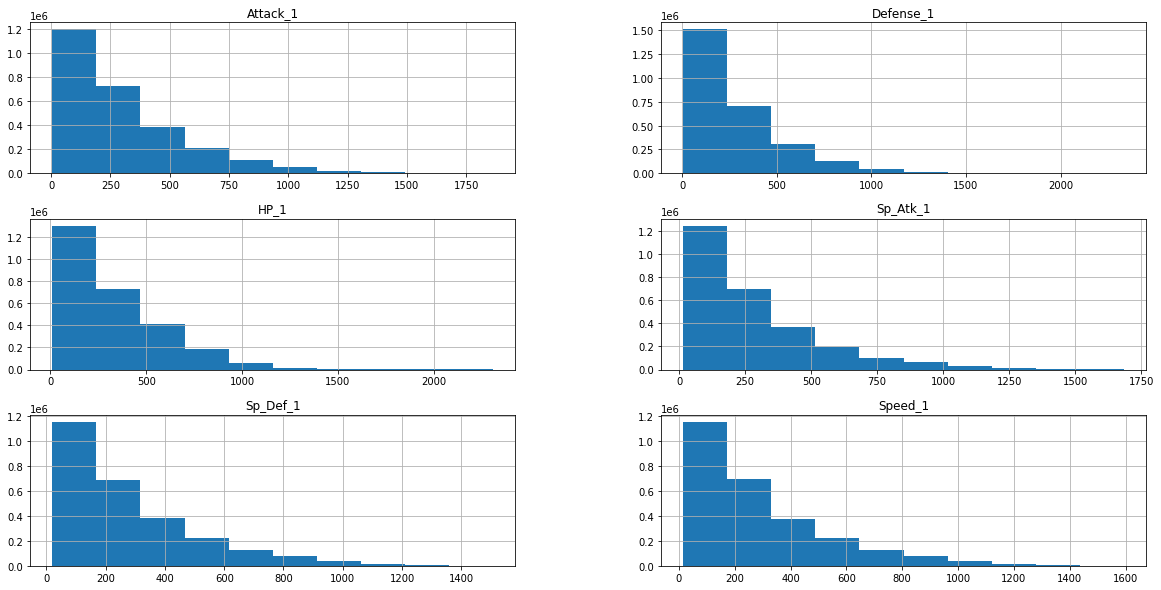

In [19]:

BattleResults.hist(column=["HP_1", "Attack_1", "Defense_1", "Speed_1", "Sp_Def_1", "Sp_Atk_1"], figsize=(20, 10))

### Weaknesses

In [4]:
Weakness_Pokemon

,Types,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,0.6,1.0,1.0,0.6,1.0
1,Fire,1.0,0.6,0.6,1.0,50.0,6.0,1.0,1.0,1.0,1.0,1.0,6.0,0.6,1.0,0.6,1.0,6.0,1.0
2,Water,1.0,20.0,0.6,1.0,0.6,1.0,1.0,1.0,6.0,1.0,1.0,1.0,6.0,1.0,0.6,1.0,1.0,1.0
3,Electric,1.0,1.0,6.0,0.6,0.6,1.0,1.0,1.0,0.6,6.0,1.0,1.0,1.0,1.0,0.6,1.0,1.0,1.0
4,Grass,1.0,0.6,6.0,1.0,0.6,1.0,1.0,0.6,6.0,0.6,1.0,0.6,6.0,1.0,0.6,1.0,0.6,1.0
5,Ice,1.0,0.6,0.6,1.0,6.0,0.6,1.0,1.0,6.0,6.0,1.0,1.0,1.0,1.0,6.0,1.0,0.6,1.0
6,Fighting,6.0,1.0,1.0,1.0,1.0,6.0,1.0,0.6,1.0,0.6,0.6,0.6,6.0,0.6,1.0,6.0,6.0,0.6
7,Poison,1.0,1.0,1.0,1.0,6.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0,0.6,0.6,1.0,1.0,0.6,6.0
8,Ground,1.0,6.0,1.0,6.0,0.6,1.0,1.0,6.0,1.0,0.6,1.0,0.6,6.0,1.0,1.0,1.0,6.0,1.0
9,Flying,1.0,1.0,1.0,0.6,6.0,1.0,6.0,1.0,1.0,1.0,1.0,6.0,0.6,1.0,1.0,1.0,0.6,1.0


In [4]:
Submission

,Name_2,Level_2,WeatherAndTime,Price_2,HP_2,Attack_2,Defense_2,Sp_Atk_2,Sp_Def_2,Speed_2,Legendary_2,SelectedPokemonID
0,Caterpie,5,Rain,216,50,33,39,22,22,50,False,0
1,Golem,42,Windy,1407,258,332,362,148,184,123,False,0
2,Krabby,50,Rain,1287,183,405,333,91,91,184,False,0
3,Mewtwo,73,Unknown,4107,689,671,522,935,522,768,True,0
4,Raichu,41,Night,1415,227,252,150,252,228,306,False,0
5,Venusaur,30,Night,1111,177,173,174,208,208,171,False,0


In [11]:
All_Pokemons.head()

,ID,Name,Type_1,Type_2
0,1,Bulbasaur,Grass,Poison
1,2,Ivysaur,Grass,Poison
2,3,Venusaur,Grass,Poison
3,4,Charmander,Fire,NaN
4,5,Charmeleon,Fire,NaN


In [16]:
AvailablePokemons.describe()

,Level_1,Price_1,HP_1,Attack_1,Defense_1,Sp_Atk_1,Sp_Def_1,Speed_1,SelectedPokemonID
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,49.555556,1780.164583,335.111806,306.461806,286.778472,282.377083,281.086111,288.349306,720.500000
std,28.526052,1365.719899,278.382700,266.739844,245.495517,245.183504,234.714517,241.031097,415.836506
min,1.000000,205.000000,10.000000,5.000000,5.000000,17.000000,25.000000,18.000000,1.000000
25%,25.000000,721.750000,128.000000,115.000000,107.750000,111.000000,109.000000,109.750000,360.750000
50%,49.000000,1328.500000,243.500000,220.000000,205.000000,194.000000,200.000000,203.500000,720.500000
75%,74.000000,2457.750000,464.000000,411.500000,381.250000,383.000000,387.250000,390.750000,1080.250000
max,99.000000,7526.000000,2312.000000,1865.000000,2336.000000,1578.000000,1275.000000,1511.000000,1440.000000


In [15]:
All_Pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
ID        151 non-null int64
Name      151 non-null object
Type_1    151 non-null object
Type_2    65 non-null object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
